In [1]:
import json
import csv
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

C:\Users\palak\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import string

In [4]:
import re

# Converting CSV to pandas dataframe

In [5]:
question_pd = pd.read_csv("Questions.csv",encoding="latin-1") 

In [6]:
question_pd.shape

(1264216, 7)

In [7]:
tags_pd = pd.read_csv("Tags.csv",encoding="latin-1") #id and tag 

In [8]:
tags_pd.shape

(3750994, 2)

In [9]:
question_pd[:5]

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [10]:
tags_pd[:5]

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [11]:
tags_pd = tags_pd.dropna(how='any',axis=0) #drop any null value row, tag or id

In [12]:
tags_pd.Tag = tags_pd.Tag.apply(lambda x: x.lower()) #convert text to lower case

In [13]:
tags_pd.shape

(3749881, 2)

In [14]:
len(tags_pd['Tag'].unique().tolist()) #how many unique tags # No of unique tags

37034

In [15]:
tags_pd['count'] = tags_pd.groupby('Tag')['Tag'].transform('count') # count of each tags

In [16]:
tags_pd[:5]

,Id,Tag,count
0,80,flex,2430
1,80,actionscript-3,4039
2,80,air,738
3,90,svn,2361
4,90,tortoisesvn,441


In [17]:
import matplotlib
%matplotlib inline

In [18]:
tags_pd['Tag'].value_counts() # value count of each tag

javascript                   124155
java                         115212
c#                           101186
php                           98808
android                       90659
jquery                        78542
python                        64601
html                          58976
c++                           47591
ios                           47009
mysql                         42464
css                           42308
sql                           35782
asp.net                       29970
objective-c                   26922
ruby-on-rails                 25789
.net                          24059
c                             23238
iphone                        21539
angularjs                     20345
arrays                        19799
sql-server                    18160
json                          17669
ruby                          17013
r                             15701
ajax                          15629
regex                         15349
xml                         

In [19]:
tags_pd['Tag'].value_counts()[:10]

javascript    124155
java          115212
c#            101186
php            98808
android        90659
jquery         78542
python         64601
html           58976
c++            47591
ios            47009
Name: Tag, dtype: int64

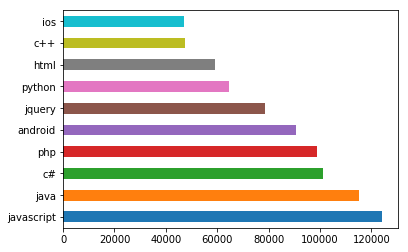

In [20]:
tags_pd['Tag'].value_counts()[:10].plot(kind='barh')

In [21]:
top10_df = tags_pd['Tag'].value_counts()[:10].reset_index() #create dataframe of top 10 tags

In [22]:
top10_df[:10]

,index,Tag
0,javascript,124155
1,java,115212
2,c#,101186
3,php,98808
4,android,90659
5,jquery,78542
6,python,64601
7,html,58976
8,c++,47591
9,ios,47009


In [23]:
top10_list = top10_df['index'].tolist() #convert tags into list

In [24]:
tags_pd_final = tags_pd[tags_pd['Tag'].isin(top10_list)] #filtering dataframe based on top10 popular tags

In [25]:
tags_pd_final.shape

(826739, 3)

In [26]:
len(tags_pd_final['Tag'].unique().tolist()) #making sure unique tags are 10

10

In [27]:
question_pd_1 = question_pd.drop(question_pd.columns[[2,3,4]],axis=1)

In [28]:
question_pd_1.shape

(1264216, 4)

# preprocessing of Title and Body

In [29]:
question_pd_1.Title = question_pd_1.Title.apply(lambda x: x.lower())
question_pd_1.Body = question_pd_1.Body.apply(lambda x: x.lower()) #convert text into lowercase

In [30]:
question_pd_1.Body = question_pd_1.Body.apply(lambda x: x.replace('"','').replace("\n","").replace("\t",""))

In [31]:
question_pd_1.Title = question_pd_1.Title.apply(lambda x: x.replace('"','').replace("\n","").replace("\t",""))

In [32]:
import re

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

In [33]:
question_pd_1['Text'] = question_pd_1['Body'].apply(cleanhtml) #removing html tags

In [34]:
question_pd_1['Title'] = question_pd_1['Title'].apply(cleanhtml) #removing html tags

In [35]:
question_pd_1['Text'] = question_pd_1['Text'].str.replace('[^\w\s]',' ') #removing punctuation marks

In [36]:
question_pd_1['Title'] = question_pd_1['Title'].str.replace('[^\w\s]',' ') #removing punctuation marks

In [37]:
def singlespace(text):
    return ' '.join(text.split())


In [38]:
question_pd_1['Text'] = question_pd_1['Text'].apply(singlespace)

In [39]:
question_pd_1['Title'] = question_pd_1['Title'].apply(singlespace)

In [40]:
question_pd_1['Text'][0]

'i ve written a database generation script in sql and want to execute it in my adobe air application create table trole roleid integer primary key rolename varchar 40 create table tfile fileid integer primary key filename varchar 50 filedescription varchar 500 thumbnailid integer fileformatid integer categoryid integer isfavorite boolean dateadded date globalaccesscount integer lastaccesstime date downloadcomplete boolean isnew boolean isspotlight boolean duration varchar 30 create table tcategory categoryid integer primary key categoryname varchar 50 parent_categoryid integer i execute this in adobe air using the following methods public static function runsqlfromfile filename string void var file file file applicationdirectory resolvepath filename var stream filestream new filestream stream open file filemode read var strsql string stream readutfbytes stream bytesavailable nonquery strsql public static function nonquery strsql string void var sqlconnection sqlconnection new sqlconnec

In [41]:
question_pd_1['Title'][0]

'sqlstatement execute multiple queries in one statement'

In [42]:
question_pd_1.shape

(1264216, 5)

In [43]:
tags_pd_final.shape

(826739, 3)

In [44]:
tags_pd_final[:5]

,Id,Tag,count
14,260,c#,101186
18,330,c++,47591
28,650,c#,101186
35,930,c#,101186
39,1010,c#,101186


In [45]:
tags_pd['Id'].value_counts()[:10]

36444300    5
12984310    5
37649730    5
36079950    5
36907250    5
16583980    5
37335040    5
36202910    5
20150520    5
3276520     5
Name: Id, dtype: int64

In [46]:
tags_pd_final_1 = tags_pd_final[tags_pd_final.duplicated(['Id'],keep = 'first')] #just taking one tag for each Id

In [47]:
tags_pd_final_1[:5]

,Id,Tag,count
312,11060,python,64601
367,12870,php,98808
647,23370,c++,47591
982,33080,html,58976
1030,34120,html,58976


In [48]:
tags_pd_final_2 = tags_pd_final_1.drop(tags_pd_final_1.columns[[2]],axis=1) 

In [49]:
tags_pd_final_2.shape

(120403, 2)

In [50]:
question_pd_1.shape

(1264216, 5)

In [51]:
question_pd_1[:5]

,Id,OwnerUserId,Title,Body,Text
0,80,26.0,sqlstatement execute multiple queries in one s...,<p>i've written a database generation script i...,i ve written a database generation script in s...
1,90,58.0,good branching and merging tutorials for torto...,<p>are there any really good tutorials explain...,are there any really good tutorials explaining...
2,120,83.0,asp net site maps,<p>has anyone got experience creating <strong>...,has anyone got experience creating sql based a...
3,180,2089740.0,function for creating color wheels,<p>this is something i've pseudo-solved many t...,this is something i ve pseudo solved many time...
4,260,91.0,adding scripting functionality to net applicat...,<p>i have a little game written in c#. it uses...,i have a little game written in c it uses a da...


In [52]:
question_pd_2 = question_pd_1.drop(question_pd_1.columns[[1,3]],axis=1)

In [53]:
question_pd_2.shape

(1264216, 3)

# Combining dataframes

In [54]:
merged_df = pd.merge(question_pd_2, tags_pd_final_2, on='Id')

In [55]:
merged_df.shape

(120403, 4)

In [56]:
merged_df[:5]

,Id,Title,Text,Tag
0,11060,how should i unit test a code generator,this is a difficult and open ended question i ...,python
1,12870,arrays of arrays in java,this is a nasty one for me i m a php guy worki...,php
2,23370,notification of drop in drag drop in windows,my c program has a list of files that can be d...,c++
3,33080,setting the height of a div dynamically,in a web application i have a page that contai...,html
4,34120,html scraping in php,i ve been doing some html scraping in php usin...,html


# stemming and removing stop words using nltk

In [57]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [58]:
stop_words = stopwords.words('english')
porter = PorterStemmer()

In [59]:
merged_df['Text'] = merged_df['Text'].str.replace('\d+', '')   #removing digits
merged_df['Title'] = merged_df['Title'].str.replace('\d+', '') #removing digits

In [60]:
#remove stop words  2 mins
merged_df['Text']=merged_df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [61]:
#remove stop words 
merged_df['Title']=merged_df['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [62]:
#stemming of words
merged_df['Title']=merged_df['Title'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))

In [63]:
#stemming of words 6 mins
merged_df['Text']=merged_df['Text'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))

# Making corpus ready for TF-IDF vectorizer

In [64]:
titleList = merged_df['Title'].tolist()

In [65]:
len(titleList)

120403

In [66]:
textList = merged_df['Text'].tolist()

In [67]:
len(textList)

120403

# TF-IDF vectorizer

In [68]:
import sklearn.feature_extraction.text as sk_text

vectorizer = sk_text.TfidfVectorizer(
                             stop_words='english',
                             max_features = 1000, # max 1000 features
                             min_df=1)
matrix = vectorizer.fit_transform(textList)

print(type(matrix))          # Compressed Sparse Row matrix
print(matrix.toarray())        #  convert it to numpy array

print(vectorizer.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13197794 0.         ... 0.         0.         0.        ]]
['_file', '_get', '_post', '_session', 'abl', 'absolut', 'accept', 'access', 'accordion', 'account', 'achiev', 'action', 'activ', 'activitythread', 'actual', 'ad', 'adapt', 'add', 'addclass', 'addeventlisten', 'addit', 'address', 'admin', 'advanc', 'age', 'ajax', 'alert', 'align', 'allow', 'alreadi', 'alt', 'alway', 'amet', 'amp', 'anchor', 'android', 'androidruntim', 'angular', 'anim', 'anoth', 'answer', 'anyon', 'anyth', 'apach', 'api', 'apk', 'app', 'appear', 'append', 'appendchild', 'appendto', 'appli', 'appl

In [69]:
array_1 = matrix.toarray()

In [70]:
import sklearn.feature_extraction.text as sk_text

vectorizer_2 = sk_text.TfidfVectorizer(
                             stop_words='english',
                             max_features = 1000,
                             min_df=1)
matrix_2 = vectorizer_2.fit_transform(titleList)

print(type(matrix_2))          # Compressed Sparse Row matrix
print(matrix_2.toarray())        #  convert it to numpy array

print(vectorizer_2.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['_post', 'abl', 'absolut', 'accept', 'access', 'accord', 'accordion', 'act', 'action', 'activ', 'actual', 'ad', 'adapt', 'add', 'addclass', 'addit', 'address', 'adjust', 'affect', 'ajax', 'alert', 'align', 'allow', 'alreadi', 'alter', 'altern', 'alway', 'analyt', 'anchor', 'android', 'angular', 'angularj', 'anim', 'anoth', 'answer', 'anyth', 'apach', 'api', 'apk', 'app', 'appear', 'append', 'applet', 'appli', 'applic', 'area', 'argument', 'array', 'arraylist', 'arrow', 'asp', 'asset', 'assign', 'associ', 'async', 'asynchron', 'asynctask', 'attach', 'attempt', 'attr', 'attribut', 'audio', 'authent', 'auto', 'autocomplet', 'automat', 'avail', 'avoid', 'axi', 'backbon', 'backend', 'background', 'bad', 'bar', 'base', 'basic', 'becom', 'behav', 'behavior', 'behaviour', 'best', 'better', 'big', 'bina

In [71]:
array_2 = matrix_2.toarray()

In [72]:
array_2.shape #title

(120403, 1000)

In [73]:
array_1.shape #text

(120403, 1000)

# Making output vector ready

In [74]:
tagList = merged_df['Tag'].tolist() 

In [75]:
tagList = np.array(tagList)

In [76]:
type(tagList)

numpy.ndarray

In [77]:
tagList.shape

(120403,)

In [78]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
normalized_y=lb.fit_transform(tagList)
lb.classes_

#Label encoding for Scikit Learn models

array(['android', 'c#', 'c++', 'html', 'ios', 'java', 'javascript',
       'jquery', 'php', 'python'], dtype='<U10')

In [79]:
normalized_y[:10]

array([9, 8, 2, 3, 3, 7, 9, 5, 7, 3], dtype=int64)

In [80]:
len(normalized_y)

120403

In [81]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)  #One Hot Encoding for Neural Network

In [82]:
# columns
columns_new = ['normalized_y']

# pass in array and columns
df_y = pd.DataFrame(normalized_y , columns=columns_new)

In [83]:
encode_text_dummy(df_y,'normalized_y')

In [84]:
df_y[:5]

,normalized_y-0,normalized_y-1,normalized_y-2,normalized_y-3,normalized_y-4,normalized_y-5,normalized_y-6,normalized_y-7,normalized_y-8,normalized_y-9
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0


In [85]:
df_encoded = df_y.values

In [86]:
df_encoded.shape

(120403, 10)

In [87]:
df_encoded[:10]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [88]:
X = array_1

In [89]:
X.shape

(120403, 1000)

In [90]:
from sklearn.model_selection import train_test_split

# Neural Network Model

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,df_encoded,test_size=0.25,random_state=1)

In [99]:
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [100]:
from keras.models import  Sequential
from keras.layers import Dense

### Activation : Relu , Optimizer : Adam , Two Hidden layers

In [101]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(80, input_dim=X_train.shape[1], activation='relu')) # Hidden 1  
    model_classification.add(Dense(60, activation='relu')) # Hidden 2
    model_classification.add(Dense(10,activation='softmax')) # Output
    model_classification.compile(loss='binary_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
    

0
Train on 90302 samples, validate on 30101 samples
Epoch 1/1000
 - 6s - loss: 0.1662 - val_loss: 0.1543
Epoch 2/1000
 - 5s - loss: 0.1482 - val_loss: 0.1504
Epoch 3/1000
 - 5s - loss: 0.1421 - val_loss: 0.1491
Epoch 4/1000
 - 5s - loss: 0.1376 - val_loss: 0.1495
Epoch 5/1000
 - 5s - loss: 0.1335 - val_loss: 0.1506
Epoch 6/1000
 - 5s - loss: 0.1295 - val_loss: 0.1531
Epoch 7/1000
 - 5s - loss: 0.1258 - val_loss: 0.1563
Epoch 8/1000
 - 5s - loss: 0.1219 - val_loss: 0.1605
Epoch 00008: early stopping
1
Train on 90302 samples, validate on 30101 samples
Epoch 1/1000
 - 5s - loss: 0.1664 - val_loss: 0.1547
Epoch 2/1000
 - 5s - loss: 0.1486 - val_loss: 0.1500
Epoch 3/1000
 - 5s - loss: 0.1424 - val_loss: 0.1495
Epoch 4/1000
 - 5s - loss: 0.1376 - val_loss: 0.1502
Epoch 5/1000
 - 5s - loss: 0.1335 - val_loss: 0.1510
Epoch 6/1000
 - 5s - loss: 0.1296 - val_loss: 0.1527
Epoch 7/1000
 - 5s - loss: 0.1256 - val_loss: 0.1563
Epoch 00007: early stopping
2
Train on 90302 samples, validate on 30101 s

In [102]:
from sklearn import metrics

In [103]:
model_classification.load_weights('best_weights.hdf5')
pred = model_classification.predict(X_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_test,axis=1) 

print("test", y_true[:25])
print("pred", pred[:25])

print(metrics.confusion_matrix(y_true,pred))

pr_score = metrics.precision_score(y_true, pred, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred, average= "weighted")
print("Recall score: {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred, average= "weighted")
print("F1 score: {}".format(f1_score))

test [7 0 1 7 3 3 3 3 3 5 8 3 0 3 7 3 8 6 7 7 7 7 3 0 7]
pred [7 0 0 7 3 7 3 7 7 2 7 7 0 3 3 7 7 9 3 3 3 7 3 0 3]
[[4257    0   71  116   88    2   10  121   18    9]
 [  33    1   16   38    1    5   40  101    2    3]
 [ 105    2  336   21   10    5    6   29    8   35]
 [ 138    1   16 4789   39    2  114 3557  180   40]
 [ 112    0   36   98  363    2    8   86    8    5]
 [  50    0   36   32    1   13   19   35    3    3]
 [  45    2   16  336    6    3  248  464  123    3]
 [  80    1   10 2020   43    1  124 9054  213   18]
 [  75    0   11  386   12    1  108  631  354    9]
 [  26    1   39   47    7    0    3   52    3  251]]
Precision score: 0.6344393263257423
Recall score: 0.6533337762865021
F1 score: 0.636925454214566


### Activation : Relu , Optimizer : Adam, 3 Hidden layers

In [132]:
checkpointer = ModelCheckpoint(filepath="best_weights_2.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(90, input_dim=X_train.shape[1], activation='relu')) # Hidden 1  
    model_classification.add(Dense(60, activation='relu')) # Hidden 2
    model_classification.add(Dense(40, activation='relu')) # Hidden 2
    model_classification.add(Dense(10,activation='softmax')) # Output
    model_classification.compile(loss='binary_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
    

0
Train on 90302 samples, validate on 30101 samples
Epoch 1/1000
 - 7s - loss: 0.1665 - val_loss: 0.1537
Epoch 2/1000
 - 6s - loss: 0.1483 - val_loss: 0.1514
Epoch 3/1000
 - 6s - loss: 0.1417 - val_loss: 0.1492
Epoch 4/1000
 - 6s - loss: 0.1363 - val_loss: 0.1501
Epoch 5/1000
 - 6s - loss: 0.1314 - val_loss: 0.1527
Epoch 6/1000
 - 7s - loss: 0.1266 - val_loss: 0.1577
Epoch 7/1000
 - 7s - loss: 0.1219 - val_loss: 0.1616
Epoch 8/1000
 - 7s - loss: 0.1177 - val_loss: 0.1667
Epoch 00008: early stopping
1
Train on 90302 samples, validate on 30101 samples
Epoch 1/1000
 - 7s - loss: 0.1665 - val_loss: 0.1569
Epoch 2/1000
 - 7s - loss: 0.1489 - val_loss: 0.1517
Epoch 3/1000
 - 7s - loss: 0.1420 - val_loss: 0.1493
Epoch 4/1000
 - 7s - loss: 0.1367 - val_loss: 0.1505
Epoch 5/1000
 - 7s - loss: 0.1315 - val_loss: 0.1530
Epoch 6/1000
 - 7s - loss: 0.1266 - val_loss: 0.1584
Epoch 7/1000
 - 7s - loss: 0.1221 - val_loss: 0.1614
Epoch 8/1000
 - 7s - loss: 0.1175 - val_loss: 0.1656
Epoch 00008: early s

In [133]:
model_classification.load_weights('best_weights_2.hdf5')
pred = model_classification.predict(X_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_test,axis=1) 

print("test", y_true[:25])
print("pred", pred[:25])

cm_n1 = metrics.confusion_matrix(y_true,pred)
print(cm_n1)

pr_score = metrics.precision_score(y_true, pred, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred, average= "weighted")
print("Recall score: {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred, average= "weighted")
print("F1 score: {}".format(f1_score))

test [7 0 1 7 3 3 3 3 3 5 8 3 0 3 7 3 8 6 7 7 7 7 3 0 7]
pred [7 0 0 7 3 7 3 7 7 2 7 7 0 3 3 7 7 9 7 7 3 7 3 0 3]
[[4220    4   56  136   91    2   10  116   46   11]
 [  32    0   19   37    2    3   46   96    2    3]
 [ 112    0  312   22   11    1    9   30   11   49]
 [ 127    0   17 4266   71    1  112 4119  121   42]
 [ 105    0   23   77  404    0    6   85   12    6]
 [  49    3   36   30    4    9   21   31    6    3]
 [  42    0   14  314   11    1  255  509   97    3]
 [  96    3    9 1531   51    0  134 9617  105   18]
 [  70    0    9  401   11    1  103  718  265    9]
 [  26    2   30   49    7    0    1   52    3  259]]
Precision score: 0.6323833379756622
Recall score: 0.6513737085146672
F1 score: 0.6289226166775164


### Activation : sigmoid , Optimizer : Adam

In [106]:
checkpointer = ModelCheckpoint(filepath="best_weights_3.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(90, input_dim=X_train.shape[1], activation='relu')) # Hidden 1  
    model_classification.add(Dense(60, activation='sigmoid')) # Hidden 2
    model_classification.add(Dense(40, activation='sigmoid')) # Hidden 2
    model_classification.add(Dense(10,activation='softmax')) # Output
    model_classification.compile(loss='binary_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
    

0
Train on 90302 samples, validate on 30101 samples
Epoch 1/1000
 - 6s - loss: 0.1774 - val_loss: 0.1640
Epoch 2/1000
 - 5s - loss: 0.1582 - val_loss: 0.1566
Epoch 3/1000
 - 6s - loss: 0.1516 - val_loss: 0.1532
Epoch 4/1000
 - 6s - loss: 0.1473 - val_loss: 0.1514
Epoch 5/1000
 - 6s - loss: 0.1438 - val_loss: 0.1508
Epoch 6/1000
 - 6s - loss: 0.1405 - val_loss: 0.1509
Epoch 7/1000
 - 6s - loss: 0.1373 - val_loss: 0.1502
Epoch 8/1000
 - 6s - loss: 0.1342 - val_loss: 0.1520
Epoch 9/1000
 - 7s - loss: 0.1310 - val_loss: 0.1527
Epoch 10/1000
 - 7s - loss: 0.1278 - val_loss: 0.1557
Epoch 11/1000
 - 6s - loss: 0.1245 - val_loss: 0.1589
Epoch 12/1000
 - 6s - loss: 0.1214 - val_loss: 0.1615
Epoch 00012: early stopping
1
Train on 90302 samples, validate on 30101 samples
Epoch 1/1000
 - 7s - loss: 0.1775 - val_loss: 0.1641
Epoch 2/1000
 - 7s - loss: 0.1595 - val_loss: 0.1587
Epoch 3/1000
 - 6s - loss: 0.1531 - val_loss: 0.1549
Epoch 4/1000
 - 7s - loss: 0.1490 - val_loss: 0.1522
Epoch 5/1000
 - 7

In [107]:
model_classification.load_weights('best_weights_3.hdf5')
pred = model_classification.predict(X_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_test,axis=1) 

print("test", y_true[:25])
print("pred", pred[:25])

print(metrics.confusion_matrix(y_true,pred))

pr_score = metrics.precision_score(y_true, pred, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred, average= "weighted")
print("Recall score: {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred, average= "weighted")
print("F1 score: {}".format(f1_score))

test [7 0 1 7 3 3 3 3 3 5 8 3 0 3 7 3 8 6 7 7 7 7 3 0 7]
pred [7 0 0 7 3 7 3 7 7 2 7 7 0 3 3 7 7 9 7 7 3 7 3 0 3]
[[4235    0   71  131   80    9   10  115   30   11]
 [  29    0   19   43    1    4   34  104    4    2]
 [ 102    0  290   29    9   11    7   34   17   58]
 [ 133    0   11 5076   37    1   53 3342  173   50]
 [ 135    0   30   98  354    0    2   77   13    9]
 [  36    0   38   35    2    9   32   30    9    1]
 [  33    0   15  335    5    4  185  514  152    3]
 [  84    0    5 2246   39    0   94 8942  135   19]
 [  72    0    7  405    9    1   44  695  345    9]
 [  22    0   19   47    9    1    4   49    3  275]]
Precision score: 0.6332288172930616
Recall score: 0.6548287432311218
F1 score: 0.6372520069248536


C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Activation : tanh , Optimizer : Adam

In [108]:
checkpointer = ModelCheckpoint(filepath="best_weights_4.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(90, input_dim=X_train.shape[1], activation='relu')) # Hidden 1  
    model_classification.add(Dense(60, activation='tanh')) # Hidden 2
    model_classification.add(Dense(40, activation='tanh')) # Hidden 2
    model_classification.add(Dense(10,activation='softmax')) # Output
    model_classification.compile(loss='binary_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
    

0
Train on 90302 samples, validate on 30101 samples
Epoch 1/1000
 - 6s - loss: 0.1635 - val_loss: 0.1540
Epoch 2/1000
 - 6s - loss: 0.1472 - val_loss: 0.1511
Epoch 3/1000
 - 6s - loss: 0.1402 - val_loss: 0.1502
Epoch 4/1000
 - 6s - loss: 0.1342 - val_loss: 0.1531
Epoch 5/1000
 - 6s - loss: 0.1283 - val_loss: 0.1560
Epoch 6/1000
 - 6s - loss: 0.1227 - val_loss: 0.1615
Epoch 7/1000
 - 6s - loss: 0.1175 - val_loss: 0.1659
Epoch 00007: early stopping
1
Train on 90302 samples, validate on 30101 samples
Epoch 1/1000
 - 7s - loss: 0.1638 - val_loss: 0.1535
Epoch 2/1000
 - 7s - loss: 0.1473 - val_loss: 0.1501
Epoch 3/1000
 - 7s - loss: 0.1403 - val_loss: 0.1497
Epoch 4/1000
 - 7s - loss: 0.1343 - val_loss: 0.1519
Epoch 5/1000
 - 6s - loss: 0.1288 - val_loss: 0.1566
Epoch 6/1000
 - 6s - loss: 0.1235 - val_loss: 0.1592
Epoch 7/1000
 - 6s - loss: 0.1186 - val_loss: 0.1656
Epoch 00007: early stopping
2
Train on 90302 samples, validate on 30101 samples
Epoch 1/1000
 - 7s - loss: 0.1629 - val_loss: 

In [109]:
model_classification.load_weights('best_weights_4.hdf5')
pred = model_classification.predict(X_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_test,axis=1) 

print("test", y_true[:25])
print("pred", pred[:25])

print(metrics.confusion_matrix(y_true,pred))

pr_score = metrics.precision_score(y_true, pred, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred, average= "weighted")
print("Recall score: {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred, average= "weighted")
print("F1 score: {}".format(f1_score))

test [7 0 1 7 3 3 3 3 3 5 8 3 0 3 7 3 8 6 7 7 7 7 3 0 7]
pred [7 0 0 7 3 7 3 7 7 2 7 7 0 3 3 3 7 9 3 3 3 7 3 0 3]
[[4240    1   75  128   82    8    8  105   33   12]
 [  25    0   20   43    1    8   35  105    1    2]
 [  89    1  339   17   10   10    9   31   11   40]
 [ 129    1   19 4998   46    2   69 3402  163   47]
 [ 105    1   34  108  367    0    5   81   11    6]
 [  37    2   40   32    3   11   19   39    5    4]
 [  45    4   15  357    6    3  198  485  131    2]
 [  84    3   13 2259   38    3  110 8872  159   23]
 [  79    0   10  442   10    2   83  618  333   10]
 [  25    0   33   45    5    2    4   46    3  266]]
Precision score: 0.6305314565469917
Recall score: 0.651938473804857
F1 score: 0.63532892484678


### Activation : Relu , Optimizer : sgd

In [110]:
checkpointer = ModelCheckpoint(filepath="best_weights_5.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(90, input_dim=X_train.shape[1], activation='relu')) # Hidden 1  
    model_classification.add(Dense(60, activation='relu')) # Hidden 2
    model_classification.add(Dense(40, activation='relu')) # Hidden 2
    model_classification.add(Dense(10,activation='softmax')) # Output
    model_classification.compile(loss='binary_crossentropy', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
    

0
Train on 90302 samples, validate on 30101 samples
Epoch 1/1000
 - 6s - loss: 0.2804 - val_loss: 0.2532
Epoch 2/1000
 - 5s - loss: 0.2483 - val_loss: 0.2440
Epoch 3/1000
 - 5s - loss: 0.2424 - val_loss: 0.2389
Epoch 4/1000
 - 5s - loss: 0.2363 - val_loss: 0.2310
Epoch 5/1000
 - 7s - loss: 0.2259 - val_loss: 0.2183
Epoch 6/1000
 - 6s - loss: 0.2132 - val_loss: 0.2068
Epoch 7/1000
 - 6s - loss: 0.2046 - val_loss: 0.2009
Epoch 8/1000
 - 6s - loss: 0.2001 - val_loss: 0.1974
Epoch 9/1000
 - 6s - loss: 0.1971 - val_loss: 0.1948
Epoch 10/1000
 - 7s - loss: 0.1945 - val_loss: 0.1924
Epoch 11/1000
 - 6s - loss: 0.1919 - val_loss: 0.1899
Epoch 12/1000
 - 5s - loss: 0.1894 - val_loss: 0.1878
Epoch 13/1000
 - 6s - loss: 0.1872 - val_loss: 0.1859
Epoch 14/1000
 - 6s - loss: 0.1853 - val_loss: 0.1841
Epoch 15/1000
 - 6s - loss: 0.1835 - val_loss: 0.1826
Epoch 16/1000
 - 6s - loss: 0.1820 - val_loss: 0.1813
Epoch 17/1000
 - 6s - loss: 0.1807 - val_loss: 0.1802
Epoch 18/1000
 - 6s - loss: 0.1796 - va

Epoch 16/1000
 - 12s - loss: 0.1839 - val_loss: 0.1830
Epoch 17/1000
 - 12s - loss: 0.1825 - val_loss: 0.1817
Epoch 18/1000
 - 12s - loss: 0.1813 - val_loss: 0.1806
Epoch 19/1000
 - 12s - loss: 0.1802 - val_loss: 0.1798
Epoch 20/1000
 - 12s - loss: 0.1793 - val_loss: 0.1791
Epoch 21/1000
 - 12s - loss: 0.1784 - val_loss: 0.1783
Epoch 22/1000
 - 12s - loss: 0.1776 - val_loss: 0.1776
Epoch 23/1000
 - 12s - loss: 0.1768 - val_loss: 0.1769
Epoch 24/1000
 - 12s - loss: 0.1761 - val_loss: 0.1764
Epoch 25/1000
 - 12s - loss: 0.1754 - val_loss: 0.1758
Epoch 26/1000
 - 12s - loss: 0.1747 - val_loss: 0.1752
Epoch 27/1000
 - 12s - loss: 0.1740 - val_loss: 0.1747
Epoch 28/1000
 - 12s - loss: 0.1734 - val_loss: 0.1741
Epoch 29/1000
 - 11s - loss: 0.1727 - val_loss: 0.1737
Epoch 30/1000
 - 11s - loss: 0.1721 - val_loss: 0.1729
Epoch 31/1000
 - 12s - loss: 0.1714 - val_loss: 0.1724
Epoch 32/1000
 - 11s - loss: 0.1708 - val_loss: 0.1719
Epoch 33/1000
 - 11s - loss: 0.1702 - val_loss: 0.1713
Epoch 34/1

In [111]:
model_classification.load_weights('best_weights_5.hdf5')
pred = model_classification.predict(X_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_test,axis=1) 

print("test", y_true[:25])
print("pred", pred[:25])

print(metrics.confusion_matrix(y_true,pred))

pr_score = metrics.precision_score(y_true, pred, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred, average= "weighted")
print("Recall score: {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred, average= "weighted")
print("F1 score: {}".format(f1_score))

test [7 0 1 7 3 3 3 3 3 5 8 3 0 3 7 3 8 6 7 7 7 7 3 0 7]
pred [7 0 0 7 3 7 3 7 7 0 7 7 0 3 3 7 7 9 3 3 3 7 3 0 3]
[[4269    0   30  188   64    0    1  122   14    4]
 [  42    0    8   53    3    0   14  116    0    4]
 [ 200    0  167   59   17    0    7   35    5   67]
 [ 140    0    6 5284   32    0   20 3280   79   35]
 [ 198    0   16  120  256    0    2  100   15   11]
 [  70    0   23   52    2    0    5   37    1    2]
 [  64    0   15  497   15    0   68  510   73    4]
 [  89    0    4 2538   32    0   37 8743  112    9]
 [  93    0   13  601   12    0   21  651  187    9]
 [  40    0   39   74    9    0   11   49    2  205]]
Precision score: 0.6057660716507528
Recall score: 0.6371549117969503
F1 score: 0.6093691691364145


C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Activation : Relu , Optimizer : rmsprop

In [112]:
checkpointer = ModelCheckpoint(filepath="best_weights_6.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(2):
    print(i)
    model_classification = Sequential()
    model_classification.add(Dense(70, input_dim=X_train.shape[1], activation='relu')) # Hidden 1  
    model_classification.add(Dense(40, activation='relu')) # Hidden 2
    model_classification.add(Dense(20, activation='relu')) # Hidden 2
    model_classification.add(Dense(10,activation='softmax')) # Output
    model_classification.compile(loss='binary_crossentropy', optimizer='rmsprop')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_classification.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)
    

0
Train on 90302 samples, validate on 30101 samples
Epoch 1/1000
 - 13s - loss: 0.1726 - val_loss: 0.1608
Epoch 2/1000
 - 12s - loss: 0.1559 - val_loss: 0.1550
Epoch 3/1000
 - 12s - loss: 0.1505 - val_loss: 0.1540
Epoch 4/1000
 - 12s - loss: 0.1471 - val_loss: 0.1515
Epoch 5/1000
 - 12s - loss: 0.1447 - val_loss: 0.1511
Epoch 6/1000
 - 12s - loss: 0.1428 - val_loss: 0.1511
Epoch 7/1000
 - 11s - loss: 0.1414 - val_loss: 0.1519
Epoch 8/1000
 - 12s - loss: 0.1398 - val_loss: 0.1543
Epoch 9/1000
 - 13s - loss: 0.1386 - val_loss: 0.1555
Epoch 00009: early stopping
1
Train on 90302 samples, validate on 30101 samples
Epoch 1/1000
 - 14s - loss: 0.1708 - val_loss: 0.1585
Epoch 2/1000
 - 13s - loss: 0.1542 - val_loss: 0.1537
Epoch 3/1000
 - 12s - loss: 0.1495 - val_loss: 0.1519
Epoch 4/1000
 - 12s - loss: 0.1466 - val_loss: 0.1523
Epoch 5/1000
 - 12s - loss: 0.1444 - val_loss: 0.1517
Epoch 6/1000
 - 12s - loss: 0.1426 - val_loss: 0.1521
Epoch 7/1000
 - 12s - loss: 0.1409 - val_loss: 0.1540
Epoc

In [113]:
model_classification.load_weights('best_weights_6.hdf5')
pred = model_classification.predict(X_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_test,axis=1) 

print("test", y_true[:25])
print("pred", pred[:25])

print(metrics.confusion_matrix(y_true,pred))

pr_score = metrics.precision_score(y_true, pred, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred, average= "weighted")
print("Recall score: {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred, average= "weighted")
print("F1 score: {}".format(f1_score))

test [7 0 1 7 3 3 3 3 3 5 8 3 0 3 7 3 8 6 7 7 7 7 3 0 7]
pred [7 0 0 7 3 7 3 7 7 2 7 7 0 3 3 7 7 9 3 7 3 7 7 0 3]
[[4274    0   73  103   73   23    5  117   15    9]
 [  28    2   19   37    1    8   35  106    2    2]
 [ 101    0  311   25   11   27    7   27   13   35]
 [ 160    0   19 4727   38    8   84 3700   95   45]
 [ 112    0   27  104  366    1    4   88    8    8]
 [  38    0   36   34    4   27   14   34    3    2]
 [  46    3   19  335    7   18  204  520   91    3]
 [  98    2   12 1991   31    0  112 9207   91   20]
 [  81    0   13  410    7    5  107  714  240   10]
 [  31    1   43   41    4    6    1   57    3  242]]
Precision score: 0.6314059767545898
Recall score: 0.6511411581010598
F1 score: 0.630615579518859


# LSTM

In [99]:
X_train.shape

(90302, 1000)

In [100]:
y_train.shape

(90302, 10)

In [101]:
X_train_rnn = X_train.reshape(90302,1000,1)

In [102]:
X_train_rnn.shape

(90302, 1000, 1)

In [103]:
X_test.shape

(30101, 1000)

In [104]:
X_test_rnn = X_test.reshape(30101,1000,1)

In [105]:
X_test_rnn.shape

(30101, 1000, 1)

In [106]:
y_train_rnn = y_train.reshape(90302, 10)

In [107]:
y_test_rnn = y_test.reshape(30101,10)

In [108]:
from keras.layers import Dense, Embedding , Dropout
from keras.layers import LSTM
from keras import regularizers

In [109]:
y_train_rnn[:5]

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]], dtype=uint8)

In [110]:
checkpointer = ModelCheckpoint(filepath="RNN_best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
    
    print(i)
    print('Build model...')
    
    model_rnn = Sequential()

    model_rnn.add(LSTM(100,activation='tanh', input_shape=(1000,1)))
    model_rnn.add(Dense(30 , activation = 'relu'))
    model_rnn.add(Dense(10,activation='softmax'))

    model_rnn.compile(loss='binary_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    print('Train...')

    model_rnn.fit(X_train_rnn[:10000],y_train_rnn[:10000],validation_data=(X_test_rnn[:1000],y_test_rnn[:1000]),callbacks=[monitor,checkpointer],verbose=2, epochs=100)

0
Build model...
Train...
Train on 10000 samples, validate on 1000 samples
Epoch 1/100
 - 152s - loss: 0.2502 - val_loss: 0.2415
Epoch 2/100
 - 137s - loss: 0.2449 - val_loss: 0.2420
Epoch 3/100
 - 145s - loss: 0.2448 - val_loss: 0.2414
Epoch 4/100
 - 138s - loss: 0.2448 - val_loss: 0.2423
Epoch 5/100
 - 138s - loss: 0.2447 - val_loss: 0.2424
Epoch 6/100
 - 139s - loss: 0.2447 - val_loss: 0.2423
Epoch 7/100
 - 140s - loss: 0.2446 - val_loss: 0.2424
Epoch 8/100
 - 138s - loss: 0.2447 - val_loss: 0.2420
Epoch 00008: early stopping
1
Build model...
Train...
Train on 10000 samples, validate on 1000 samples
Epoch 1/100
 - 142s - loss: 0.2493 - val_loss: 0.2426
Epoch 2/100
 - 135s - loss: 0.2449 - val_loss: 0.2425
Epoch 3/100
 - 145s - loss: 0.2448 - val_loss: 0.2422
Epoch 4/100
 - 137s - loss: 0.2448 - val_loss: 0.2423
Epoch 5/100
 - 132s - loss: 0.2446 - val_loss: 0.2417
Epoch 6/100
 - 134s - loss: 0.2447 - val_loss: 0.2420
Epoch 7/100
 - 133s - loss: 0.2445 - val_loss: 0.2425
Epoch 8/100


In [111]:
model_rnn.load_weights('RNN_best_weights.hdf5')
pred = model_rnn.predict(X_test_rnn)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_test_rnn,axis=1) 

print("test", y_true[:25])
print("pred", pred[:25])

print(metrics.confusion_matrix(y_true,pred))

pr_score = metrics.precision_score(y_true, pred, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred, average= "weighted")
print("Recall score: {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred, average= "weighted")
print("F1 score: {}".format(f1_score))

test [7 0 1 7 3 3 3 3 3 5 8 3 0 3 7 3 8 6 7 7 7 7 3 0 7]
pred [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
[[    0     0     0     0     0     0     0  4692     0     0]
 [    0     0     0     0     0     0     0   240     0     0]
 [    0     0     0     0     0     0     0   557     0     0]
 [    0     0     0     0     0     0     0  8876     0     0]
 [    0     0     0     0     0     0     0   718     0     0]
 [    0     0     0     0     0     0     0   192     0     0]
 [    0     0     0     0     0     0     0  1246     0     0]
 [    0     0     0     0     0     0     0 11564     0     0]
 [    0     0     0     0     0     0     0  1587     0     0]
 [    0     0     0     0     0     0     0   429     0     0]]
Precision score: 0.1475891115858472
Recall score: 0.38417328327962524
F1 score: 0.21325236279109983


C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Scikit Learn Model

# KNN

In [92]:
X_train_sk,X_test_sk,y_train_sk,y_test_sk = train_test_split(X,normalized_y,test_size=0.25,random_state=1) #Data split for Sklearn models

In [116]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_knn.fit(X_train_sk[:5000],y_train_sk[:5000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [117]:
from sklearn import metrics

y_pred = clf_knn.predict(X_test_sk[:5000])

print("test", y_test_sk[:10])
print("pred", y_pred[:10])


cm_1 = metrics.confusion_matrix(y_test_sk[:5000],y_pred)
print(cm_1)
print("Precision Score:: ",metrics.precision_score(y_test_sk[:5000],y_pred,average='weighted'))   
print("Recall Score:: ",metrics.recall_score(y_test_sk[:5000],y_pred,average='weighted'))      
print("F1 Score:: ",metrics.f1_score(y_test_sk[:5000],y_pred,average='weighted'))

test [7 0 1 7 3 3 3 3 3 5]
pred [7 0 0 7 7 7 7 7 3 0]
[[ 591    0    2   52   21    1    1   98    0    1]
 [  10    1    0    9    0    0    0   23    0    0]
 [  29    0   14    8    2    0    0   21    0    0]
 [  40    1    2  757    7    0    1  663    5    4]
 [  36    1    2   27   21    0    0   40    0    0]
 [  15    0    1    7    0    0    0   15    0    0]
 [  18    0    1   86    1    0    2   96    6    0]
 [  39    2    1  692    6    0    4 1176    7    1]
 [  23    0    0   98    1    0    2  116   10    0]
 [  13    0    2   16    1    0    1   29    1   20]]
Precision Score::  0.49496559629314324
Recall Score::  0.5184
F1 Score::  0.48970896110920203


In [ ]:
print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_1, le.classes_)
fig=plt.figure(figsize=(250, 250))
plt.show()

print()

print(classification_report(y_test_sk, y_pred))


# SVM

In [93]:
from sklearn.svm import SVC

clf_svc = SVC()
clf_svc.fit(X_train_sk[:5000],y_train_sk[:5000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [114]:
from sklearn import metrics

y_pred = clf_svc.predict(X_test_sk[:5000])

print("test", y_test_sk[:10])
print("pred", y_pred[:10])

cm_2 = metrics.confusion_matrix(y_test_sk[:5000],y_pred)
print(cm_2)
print("Precision Score:: ",metrics.precision_score(y_test_sk[:5000],y_pred,average='weighted'))   
print("Recall Score:: ",metrics.recall_score(y_test_sk[:5000],y_pred,average='weighted'))      
print("F1 Score:: ",metrics.f1_score(y_test_sk[:5000],y_pred,average='weighted')) 

test [7 0 1 7 3 3 3 3 3 5]
pred [7 7 7 7 7 7 7 7 7 7]
[[   0    0    0    0    0    0    0  767    0    0]
 [   0    0    0    0    0    0    0   43    0    0]
 [   0    0    0    0    0    0    0   74    0    0]
 [   0    0    0    0    0    0    0 1480    0    0]
 [   0    0    0    0    0    0    0  127    0    0]
 [   0    0    0    0    0    0    0   38    0    0]
 [   0    0    0    0    0    0    0  210    0    0]
 [   0    0    0    0    0    0    0 1928    0    0]
 [   0    0    0    0    0    0    0  250    0    0]
 [   0    0    0    0    0    0    0   83    0    0]]
Precision Score::  0.14868736
Recall Score::  0.3856
F1 Score::  0.21461801385681298


C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [125]:
plt.rcParams['figure.figsize'] = [10, 5]

In [126]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(names))
   plt.xticks(tick_marks, names, rotation=45)
   plt.yticks(tick_marks, names)
   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
   

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
   fpr, tpr, thresholds = roc_curve(y, pred)
   roc_auc = auc(fpr, tpr)

   plt.figure()
   plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
   plt.plot([0, 1], [0, 1], 'k--')
   plt.xlim([0.0, 1.0])
   plt.ylim([0.0, 1.05])
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title('Receiver Operating Characteristic (ROC)')
   plt.legend(loc="lower right")
   plt.show()


Plotting confusion matrix


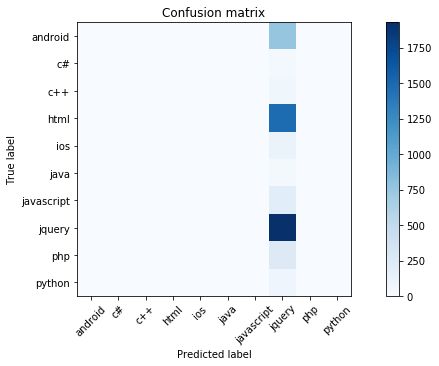

<Figure size 18000x18000 with 0 Axes>

In [127]:
print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_2, lb.classes_)
fig=plt.figure(figsize=(250, 250))
plt.show()

# Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train_sk[:5000], y_train_sk[:5000])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
y_pred = clf_lr.predict(X_test_sk)

print("test", y_test_sk[:10])
print("pred", y_pred[:10])


cm_3 = metrics.confusion_matrix(y_test_sk,y_pred)
print(cm_3)
print("Precision Score:: ",metrics.precision_score(y_test_sk,y_pred,average='weighted'))   
print("Recall Score:: ",metrics.recall_score(y_test_sk,y_pred,average='weighted'))      
print("F1 Score:: ",metrics.f1_score(y_test_sk,y_pred,average='weighted'))

test [7 0 1 7 3 3 3 3 3 5]
pred [7 0 0 7 3 7 3 7 7 0]
[[4094    0    4  206   24    0    0  347   14    3]
 [  47    0    1   45    0    0    0  147    0    0]
 [ 204    0   70   66    4    0    0  175    4   34]
 [ 129    0    1 5053    9    0    0 3617   58    9]
 [ 195    0    1  145  142    0    0  214   15    6]
 [  65    0    6   34    0    0    0   86    0    1]
 [  68    0    2  434    2    0    1  694   45    0]
 [  73    0    0 2878   14    0    0 8509   87    3]
 [  95    0    3  577    2    0    0  804  105    1]
 [  71    0    4   80    0    0    0  138    3  133]]
Precision Score::  0.6044141109297231
Recall Score::  0.6015414770273413
F1 Score::  0.5651347550420023


C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\palak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Plotting confusion matrix


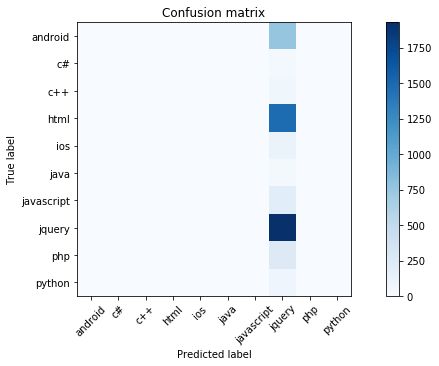

<Figure size 18000x18000 with 0 Axes>

In [129]:
print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_2, lb.classes_)
fig=plt.figure(figsize=(250, 250))
plt.show()